# Differential steering including robot's width and wheels radius

This example shows the movement of a differential robotics platform on an empty space following specific robot's wheel speeds.

The model receive the speed of each side of the platform:

$$
v_l(t)
$$

$$
v_r(t)
$$

and return the position and direction of the robot:

$$
X(t) = \left[ x(t), \ y(t), \ \theta(t) \right]
$$

In [ ]:
# Installing the modules
# Python robotics toolbox require numpy 1.2x
!pip install matplotlib numpy==1.26.4 roboticstoolbox-python

In [20]:
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import numpy as np

This example includes robot's parameters as width and wheels radius:

$$
W, \phantom{    } wr
$$

In [21]:
robot_width = 0.12
wheel_radius = 0.042

Create the robot at $ \ x=0$, $ \ y=0$, $ \ \theta=\pi/2 \ $ (90°) specifying the robot's width $W$:

In [22]:
robot = rtb.DiffSteer(W=robot_width, x0=(0, 0, np.pi/2))
robot

DiffSteer: x = [ 0, 0, 1.57 ]
  W=0.12, steer_max=inf, vel_max=inf, accel_max=inf

define the wheel speed vectors $\omega_1$ and $\omega_2$, then obtain $v_l$ and $v_r$ through the wheel radius $wr$:

$$
v_l = \omega_1 \cdot wr
$$

$$
v_r = \omega_2 \cdot wr
$$


In [23]:
ω1 = np.array([2, 4, 2, -6])
ω2 = np.array([2, -4, 2, 6])

vl = ω1*wheel_radius
vr = ω2*wheel_radius

In [24]:
times = 5

for _ in range(times):
    for vl_i, vr_i in zip(vl, vr):
        robot.step((vl_i, vr_i))
        
print(robot.x_hist)

[[ 5.14351656e-19  8.40000000e-03  1.57079633e+00]
 [ 5.14351656e-19  8.40000000e-03  1.29079633e+00]
 [ 2.32138745e-03  1.64728657e-02  1.29079633e+00]
 [ 2.32138745e-03  1.64728657e-02  1.71079633e+00]
 [ 1.14922528e-03  2.47906800e-02  1.71079633e+00]
 [ 1.14922528e-03  2.47906800e-02  1.43079633e+00]
 [ 2.32138745e-03  3.31084944e-02  1.43079633e+00]
 [ 2.32138745e-03  3.31084944e-02  1.85079633e+00]
 [-1.30104261e-18  4.11813601e-02  1.85079633e+00]
 [-1.30104261e-18  4.11813601e-02  1.57079633e+00]
 [-2.65186563e-18  4.95813601e-02  1.57079633e+00]
 [-2.65186563e-18  4.95813601e-02  1.99079633e+00]
 [-3.42518781e-03  5.72513072e-02  1.99079633e+00]
 [-3.42518781e-03  5.72513072e-02  1.71079633e+00]
 [-4.59734997e-03  6.55691216e-02  1.71079633e+00]
 [-4.59734997e-03  6.55691216e-02  2.13079633e+00]
 [-9.05931403e-03  7.26860645e-02  2.13079633e+00]
 [-9.05931403e-03  7.26860645e-02  1.85079633e+00]
 [-1.13807015e-02  8.07589302e-02  1.85079633e+00]
 [-1.13807015e-02  8.07589302e-

Text(0.5, 1.0, 'Robot location')

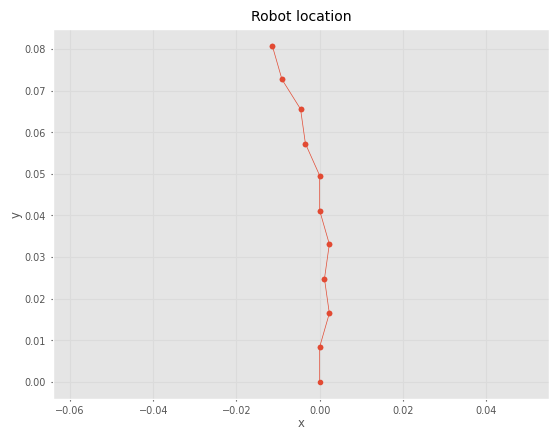

In [25]:
x = np.insert(robot.x_hist[:,0], 0, robot.x0[0])
y = np.insert(robot.x_hist[:,1], 0, robot.x0[1])

plt.plot(x, y, marker='.')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Robot location')